In [1]:
import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('ticks')
sns.__version__

'0.10.1'

## import data

In [ ]:
fetal = pd.read_csv(r'C:\Work\Tableau\fetal_health.csv')
fetal.info()
fetal.head()

## drop duplicates

In [4]:
# Dropping Duplicates
fetal_dup = fetal.copy()
fetal_dup.drop_duplicates(inplace=True)
print("Total number of duplicates are:", fetal.shape[0] - fetal_dup.shape[0])
fetal = fetal_dup.copy()
fetal

Total number of duplicates are: 13


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Custom plotting function

In [6]:
# Custom Plotting Function
def Plotter(plot, x_label, y_label, x_rot=None, y_rot=None, fontsize=12, fontweight=None, legend=None, save=False, save_name=None):
    ax.tick_params(direction='out', length=10, width=3, colors='k', grid_color='k', grid_alpha=1, grid_linewidth=2)
    plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation = x_rot)
    plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)
    
    # Legend
    if legend == None:
        pass
    elif legend == True:
        plt.legend()
        ax.legend()
        pass
    else:
        ax.legend().remove()
        
    # Labels
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color = 'k')
    plt.ylabel(y_label, fontsize=fontsize, fontweight=fontweight, color='k')
    
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
    
    if save == True:
        plt.savefig(save_name)
        

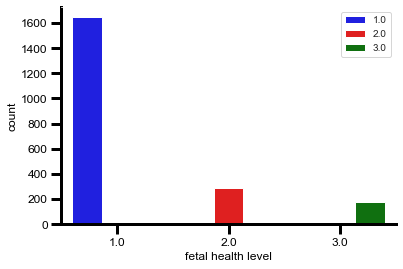

In [8]:
fig, ax = plt.subplots()
plot = sns.countplot(data= fetal, x='fetal_health', hue='fetal_health', palette=['b', 'r', 'g'])
Plotter(plot, 'fetal health level', 'count', legend=True, save=True, save_name='fetal health count.png')

#### The data is imbalanced as there are more data belonging to fetal health level 1. Technically, we should perform upsampling here. But for now we will stick to the current dataset as it is until the basic model is ready.

## Correlation

No handles with labels found to put in legend.


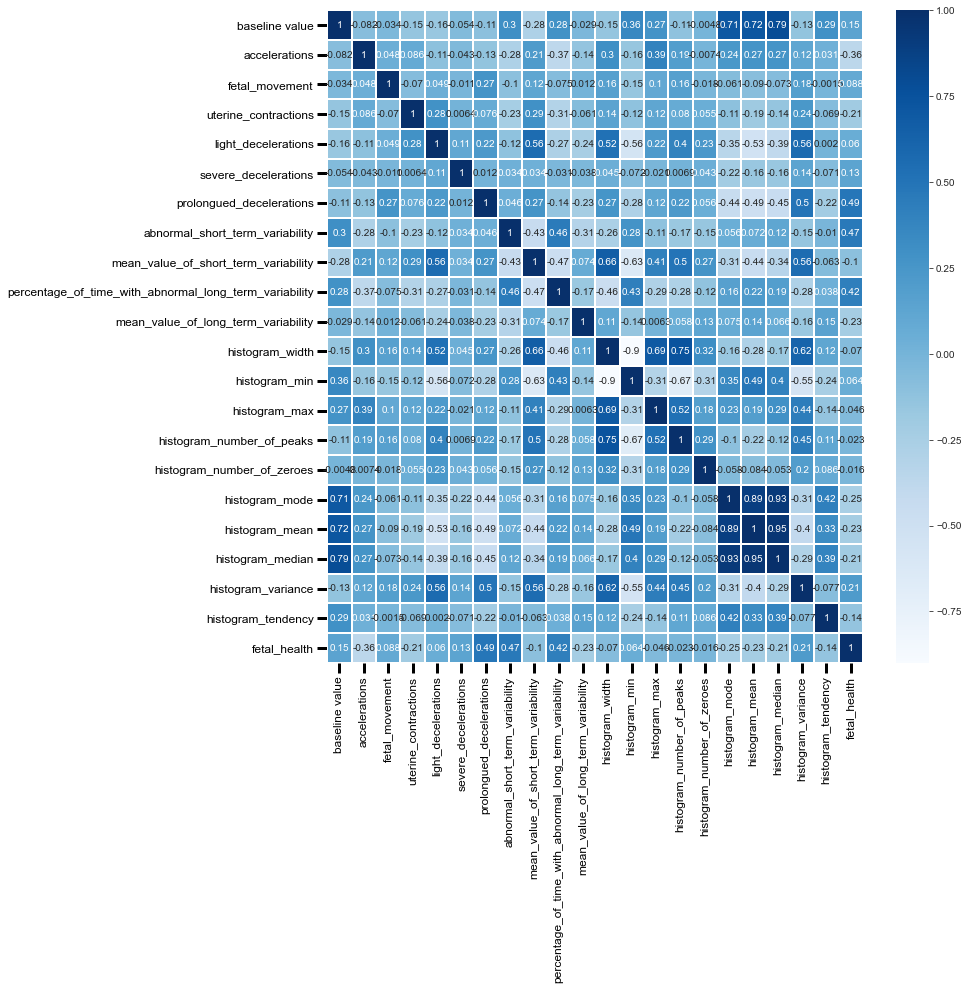

In [9]:
# Correlation   
fig, ax=plt.subplots(figsize=(12,12))#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.heatmap(fetal.corr(),annot=True, cmap='Blues', linewidths=1)
Plotter(plot, None, None, 90,legend=False, save=True, save_name='Corr.png')


#### We can see from above correlation matrix that 'prolongued_decelerations', 'abnormal_short_term_variability' and 'percentage_of_time_with_abnormal_long_term_variability' are highly correlated with 'fetal_health' with pearson coefficients of 0.49, 0.47 and 0.42 respectively.

## Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest # feature Selector
from sklearn.feature_selection import f_classif # f-ration statistic for categorical values

In [11]:
X = fetal.drop(['fetal_health'], axis = 1)
Y = fetal['fetal_health']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [12]:
dfscores


,0
0,137.833999
1,194.618345
2,11.700712
3,93.647474
4,66.750344
5,28.438837
6,507.304309
7,337.703020
8,118.050463
9,335.386156


In [13]:
dfcolumns

,0
0,baseline value
1,accelerations
2,fetal_movement
3,uterine_contractions
4,light_decelerations
5,severe_decelerations
6,prolongued_decelerations
7,abnormal_short_term_variability
8,mean_value_of_short_term_variability
9,percentage_of_time_with_abnormal_long_term_var...


In [14]:
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Feature', 'Score']

In [15]:
featureScores

,Feature,Score
0,baseline value,137.833999
1,accelerations,194.618345
2,fetal_movement,11.700712
3,uterine_contractions,93.647474
4,light_decelerations,66.750344
5,severe_decelerations,28.438837
6,prolongued_decelerations,507.304309
7,abnormal_short_term_variability,337.703020
8,mean_value_of_short_term_variability,118.050463
9,percentage_of_time_with_abnormal_long_term_var...,335.386156


No handles with labels found to put in legend.


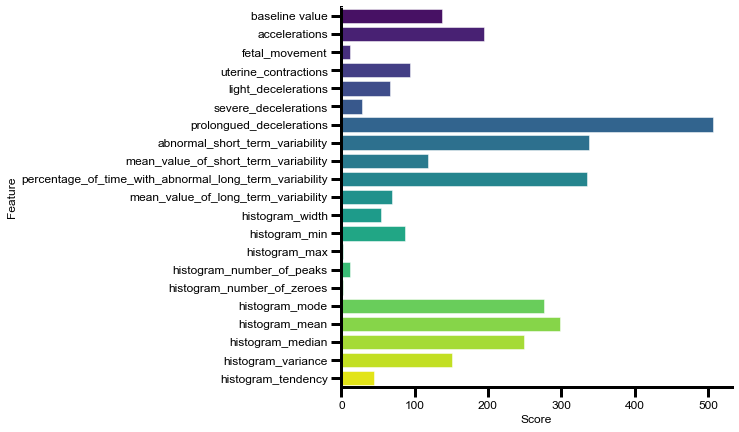

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
plot = sns.barplot(data = featureScores, x='Score', y='Feature', palette='viridis', linewidth = 0.5, saturation = 2, orient='h')
Plotter(plot, 'Score', 'Feature', legend = False, save = True, save_name='Feature Importance..png')

In [17]:
# We will take all the features that scored more than 200 as they show the least redundancy.
# Selection
selection = featureScores[featureScores['Score'] >= 200]
selection = list(selection['Feature'])
selection.append('fetal_health')
new_fetal = fetal[selection]
new_fetal.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,fetal_health
0,0.0,73.0,43.0,120.0,137.0,121.0,2.0
1,0.0,17.0,0.0,141.0,136.0,140.0,1.0
2,0.0,16.0,0.0,141.0,135.0,138.0,1.0
3,0.0,16.0,0.0,137.0,134.0,137.0,1.0
4,0.0,16.0,0.0,137.0,136.0,138.0,1.0


C:\Users\shaws\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shaws\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


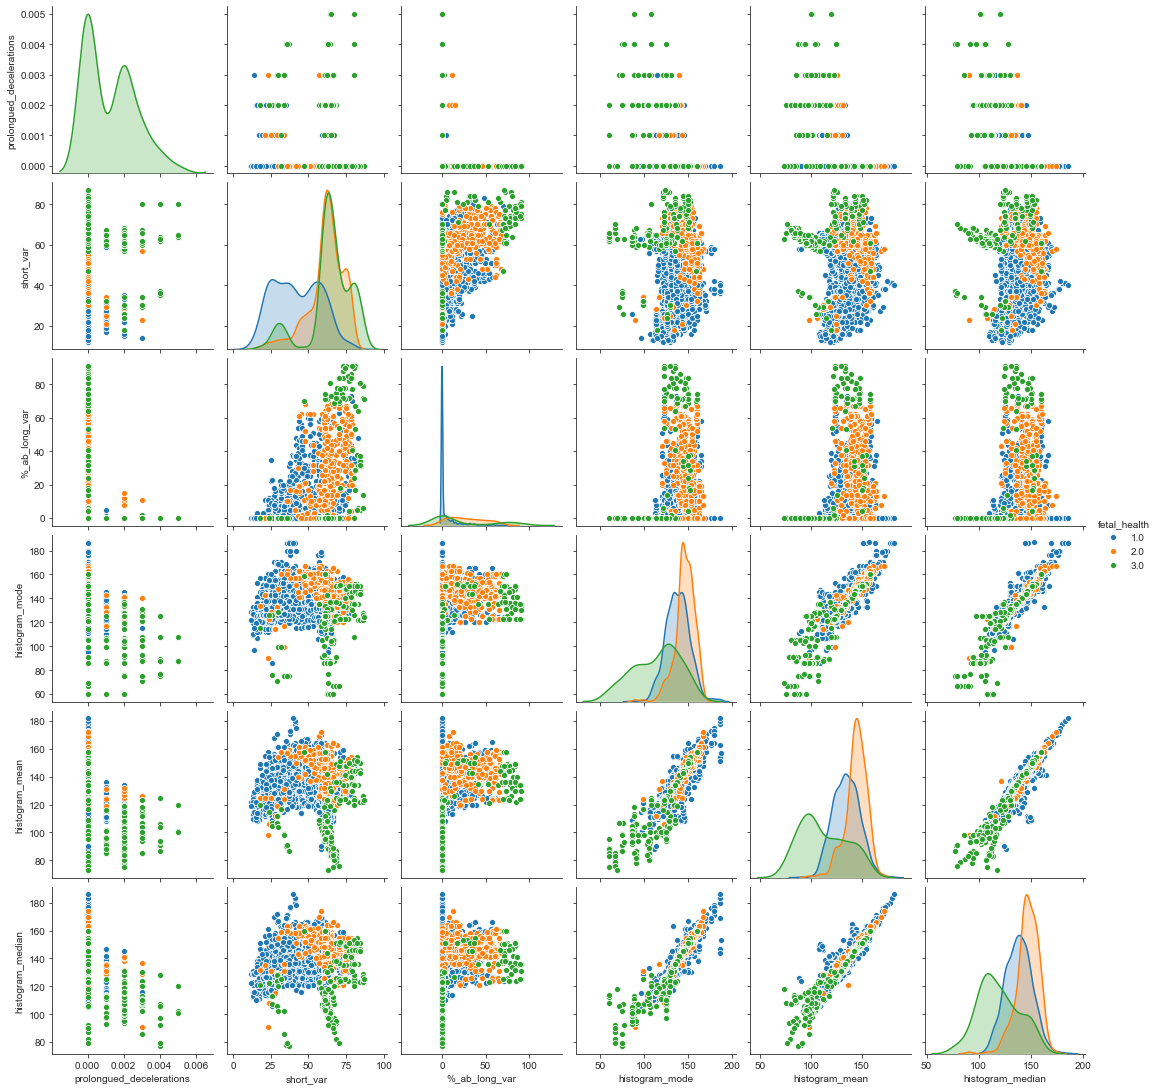

In [18]:
# Pairplot of the selected features
new_name_fetal = new_fetal.rename(columns = {'percentage_of_time_with_abnormal_long_term_variability':'%_ab_long_var', 
                                           'abnormal_short_term_variability': 'short_var'})
sns.pairplot(new_name_fetal, hue='fetal_health')


## Split the datset for training and testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(fetal.drop(['fetal_health'], axis=1), fetal['fetal_health'], test_size=0.3, random_state=0, stratify=fetal['fetal_health'])

In [21]:
# Check the shapes
print("X_train.shape: ",X_train.shape)
print("X_test.shape: ",X_test.shape)
print("y_train.shape: ",y_train.shape)
print("y_test.shape: ",y_test.shape)

X_train.shape:  (1479, 21)
X_test.shape:  (634, 21)
y_train.shape:  (1479,)
y_test.shape:  (634,)


## Scaling

In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Hyperparameter Tuning - Grid and Randomized Search

In [26]:
# Grid and Randomized search
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools 
import sys

In [27]:
def Searcher(estimator, param_grid, search, train_x, train_y, test_x, test_y, label=None, cv=10):
    try:
        if search == "grid":
            clf = GridSearchCV(estimator = estimator, 
                               param_grid = param_grid,
                               scoring=None,
                               n_jobs= -1,
                               cv = cv,
                               verbose = 0,
                               return_train_score = True,
                               )
        elif search == "random":
            clf = RandomizedSearchCV(estimator = estimator,
                               param_distributions=param_grid,
                               n_iter = 10,
                               n_jobs= -1,
                               cv = cv,
                               verbose=0,
                               random_state = 1,
                               return_train_score= True
                               )
    except:
        print('Search argument has to be "grid" or "random"' )
        sys.exit(0)
        
    # Fit the model
    print('Start model fitting for', label)
    clf.fit(X = train_x, y = train_y)
    
    # Testing the model
    try:
        if search == 'grid':
            cfmatrix = confusion_matrix(y_true = test_y, y_pred = clf.predict(test_x))
            
            print("** Grid search results of", label, "**")
            print("The best parameters are: ", clf.best_params_)
            print("best Training accuracy:\t", clf.best_score_)
            print("Classification Report:")
            print(classification_report(y_true = test_y, y_pred=clf.predict(test_x)))
            
        elif search == "random":
            cfmatrix = confusion_matrix(y_true = test_y, y_pred = clf.predict(test_x))
            
            print("** Random Search Results of", label, "**")
            print("The best parameters are: ", clf.best_params_)
            print("Best training accuracy:\t", clf.best_score_)
            print("Classification Report:")
            print(classification_report(y_true = test_y, y_pred = clf.predict(test_x)))
            
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0)
    
    return clf, cfmatrix

In [28]:
def plot_confusion_matrix(cm, label, color=None, title=None):
    classes = sorted(label)
    plt.imshow(cm, interpolation = 'nearest', cmap=color)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] < thresh else "black")



## Modelling


### Support Vector

In [29]:
from sklearn.svm import SVC

In [30]:
# Grid search SVM parameters
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100],
    "gamma": [0, .01, .1, 1],
    "kernel": ["rbf", "linear", "poly"],
    "degree": [3, 4],
    "random_state": [1]
    }

# Randomized search SVM parameters
svm_dist = {
    "C": np.arange(0.01, 100, 0.01),
    "gamma": np.arange(0, 1, 0.01),
    "kernel": ["rbf", "linear", "poly"],
    "degree": [3, 4],
    "random_state": [1]
    }


In [37]:
svm_grid, cfmatrix_grid = Searcher(SVC(), svm_param, "grid", X_train_scaled, y_train, X_test_scaled, y_test, label='SVC Grid')

print('-----'*20)

svm_rand, cfmatrix_rand = Searcher(SVC(), svm_dist, "random", X_train_scaled, y_train, X_test_scaled, y_test, label = 'SVC Random')


Start model fitting for SVC Grid
** Grid search results of SVC Grid **
The best parameters are:  {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 1}
best Training accuracy:	 0.9249448428019857
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       494
         2.0       0.80      0.75      0.78        88
         3.0       0.90      0.87      0.88        52

    accuracy                           0.93       634
   macro avg       0.89      0.86      0.87       634
weighted avg       0.93      0.93      0.93       634

----------------------------------------------------------------------------------------------------
Start model fitting for SVC Random
** Random Search Results of SVC Random **
The best parameters are:  {'random_state': 1, 'kernel': 'poly', 'gamma': 0.19, 'degree': 3, 'C': 78.11000000000001}
Best training accuracy:	 0.9087286265857696
Classification Report:
              precisi

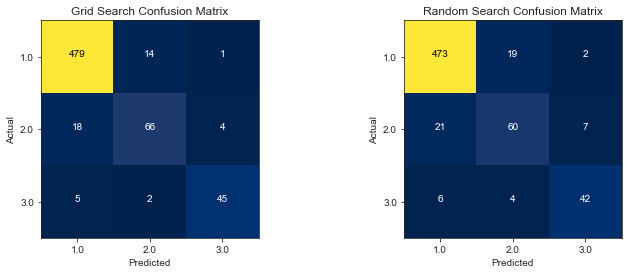

In [38]:
# Plot confusion matrix
plt.subplots(1, 2)
plt.subplots_adjust(left = -0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix', label=fetal['fetal_health'].unique(), color=plt.cm.cividis)
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=fetal['fetal_health'].unique(), color=plt.cm.cividis)

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [40]:
# Grid Search RFC Parameters
rfc_param = {
    "n_estimators": [10, 50, 75, 100, 150, 200],
    "criterion": ['entropy', 'gini'],
    "random_state": [1],
    "max_depth": np.arange(1, 16, 1)
    }

# Randomized Search RFC Parameters
rfc_dist = {
    "n_estimators": np.arange(10, 200, 10),
    "criterion": ['entropy', 'gini'],
    "random_state": [1],
    "max_depth": np.arange(1, 16, 1)
    }

In [41]:
# Grid Search RFC
rfc_grid, cfmatrix_grid = Searcher(RFC(), rfc_param, "grid", X_train_scaled, y_train, X_test_scaled, y_test, label= 'RFC Grid')

print('------'*20)

# Random Search RFC
rfc_rand, cfmatrix_rand = Searcher(RFC(), rfc_dist, "random", X_train_scaled, y_train, X_test_scaled, y_test, label='RFC Random')

Start model fitting for RFC Grid
** Grid search results of RFC Grid **
The best parameters are:  {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 200, 'random_state': 1}
best Training accuracy:	 0.9438867438867439
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       494
         2.0       0.86      0.74      0.79        88
         3.0       0.95      0.81      0.88        52

    accuracy                           0.94       634
   macro avg       0.92      0.84      0.88       634
weighted avg       0.94      0.94      0.94       634

------------------------------------------------------------------------------------------------------------------------
Start model fitting for RFC Random
** Random Search Results of RFC Random **
The best parameters are:  {'random_state': 1, 'n_estimators': 90, 'max_depth': 15, 'criterion': 'gini'}
Best training accuracy:	 0.9425353925353926
Classification Report:
    

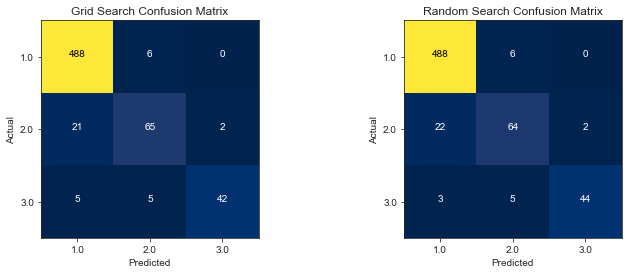

In [35]:
# Plotting the confusion matrices
plt.subplots(1, 2)
plt.subplots_adjust(left= -0.5, bottom=None, right=None, top=None, wspace= 0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title='Random Search Confusion Matrix', label= fetal['fetal_health'].unique(), color=plt.cm.cividis)
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title='Grid Search Confusion Matrix', label=fetal['fetal_health'].unique(), color=plt.cm.cividis)